In [17]:
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
with open('..\dtypes.json', 'r') as jsonfile:
    dtyp = json.load(jsonfile)

In [19]:
dtyp

{'id': 'float',
 'flag_tsunami': 'str',
 'year': 'float',
 'month': 'float',
 'day': 'float',
 'hour': 'float',
 'minute': 'float',
 'second': 'float',
 'focal_depth': 'float',
 'eq_primary': 'float',
 'eq_mag_mw': 'float',
 'eq_mag_ms': 'float',
 'eq_mag_mb': 'float',
 'intensity': 'float',
 'country': 'str',
 'state': 'str',
 'location_name': 'str',
 'latitude': 'float',
 'longitude': 'float',
 'region_code': 'str',
 'injuries': 'float',
 'injuries_description': 'str',
 'damage_millions_dollars': 'float',
 'damage_description': 'str',
 'total_injuries': 'float',
 'total_injuries_description': 'str',
 'total_damage_millions_dollars': 'float',
 'total_damage_description': 'str'}

In [20]:
data = pd.read_csv('..\Datasets\earthquake_data.csv', dtype = dtyp)

In [21]:
description_features = [
    'injuries_description', 'damage_description',
    'total_injuries_description', 'total_damage_description'
]

In [22]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

In [23]:
data[description_features] = imp.fit_transform(data[description_features])

In [24]:
category_means = data[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()
category_means

,damage_millions_dollars
damage_description,
1,0.417211
2,3.078840
3,13.818806
4,3574.998799
NA,NaN


In [25]:
replacement_values = category_means.damage_millions_dollars.to_dict()
replacement_values['NA'] = -1
replacement_values['0'] = 0
replacement_values

{'1': 0.4172105263157895,
 '2': 3.0788402777777772,
 '3': 13.818805970149256,
 '4': 3574.9987991266385,
 'NA': -1,
 '0': 0}

In [26]:
imputed_values = data.damage_description.map(replacement_values)

In [27]:
data['damage_millions_dollars'] = np.where(data.damage_millions_dollars.isnull(),
                                           data.damage_description.map(replacement_values),
                                           data.damage_millions_dollars)

In [28]:
numeric_variables = data.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
       'total_injuries', 'total_damage_millions_dollars'],
      dtype='object')

In [29]:
object_variables = data.select_dtypes(include=[np.object])
object_variables.columns

Index(['flag_tsunami', 'country', 'state', 'location_name', 'region_code',
       'injuries_description', 'damage_description',
       'total_injuries_description', 'total_damage_description'],
      dtype='object')

In [30]:
data.loc[:,'flag_tsunami'] = data.flag_tsunami.apply(lambda t: int(str(t) == 'Tsu'))

In [31]:
grouped_data = data.groupby(['intensity', 'flag_tsunami']).size()
grouped_data

intensity  flag_tsunami
2.0        0                 5
3.0        0                10
           1                 8
4.0        0                37
           1                19
5.0        0                74
           1                38
6.0        0               151
           1                63
7.0        0               342
           1                91
8.0        0               470
           1               119
9.0        0               356
           1               132
10.0       0               494
           1               130
11.0       0                79
           1                58
12.0       0                68
           1                 4
dtype: int64

In [32]:
data_to_plot = grouped_data.unstack()
data_to_plot

flag_tsunami,0,1
intensity,,
2.0,5.0,NaN
3.0,10.0,8.0
4.0,37.0,19.0
5.0,74.0,38.0
6.0,151.0,63.0
7.0,342.0,91.0
8.0,470.0,119.0
9.0,356.0,132.0
10.0,494.0,130.0


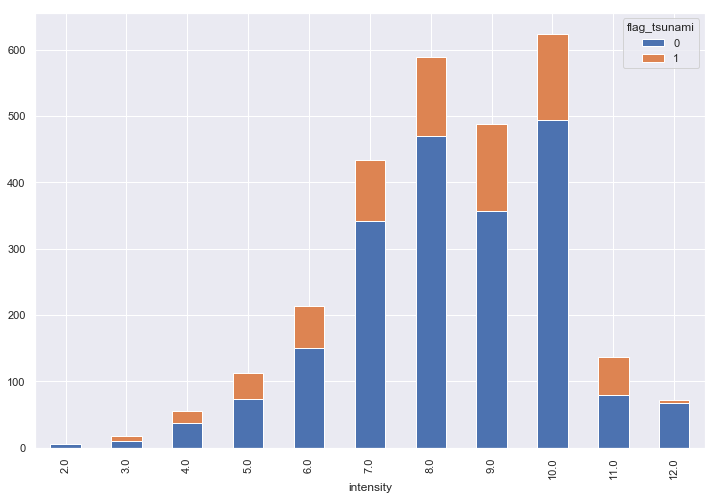

In [33]:
sns.set()
data_to_plot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.show()